✅ Model trained and logged to MLflow
📊 Accuracy: 0.7874911158493249

               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



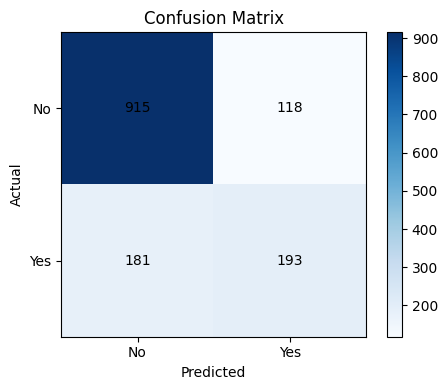

In [ ]:
# ✅ STEP 1: Install dependencies
!pip install -q scikit-learn pandas matplotlib mlflow joblib

# ✅ STEP 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import mlflow
import joblib
import os
from datetime import datetime

# ✅ STEP 3: Load dataset
df = pd.read_csv('/content/Telco-Customer-Churn.csv')
df.drop(['customerID'], axis=1, inplace=True)

# ✅ STEP 4: Handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# ✅ STEP 5: Encode categorical variables
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('Churn')
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# ✅ STEP 6: Encode target
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# ✅ STEP 7: Split data
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ STEP 8: Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ✅ STEP 9: Train model with MLflow logging
mlflow.set_experiment("Churn Prediction Pipeline")

with mlflow.start_run(run_name=f"Logistic_{datetime.now().strftime('%Y-%m-%d_%H-%M')}"):

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    mlflow.log_param("model", "LogisticRegression")
    mlflow.log_metric("accuracy", acc)

    # Save model and scaler
    joblib.dump(model, "churn_model.pkl")
    joblib.dump(scaler, "scaler.pkl")
    mlflow.log_artifact("churn_model.pkl")
    mlflow.log_artifact("scaler.pkl")

    print("✅ Model trained and logged to MLflow")
    print("📊 Accuracy:", acc)
    print("\n", classification_report(y_test, y_pred))

# ✅ STEP 10: Optional - Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.colorbar()
plt.xticks([0, 1], ['No', 'Yes'])
plt.yticks([0, 1], ['No', 'Yes'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.tight_layout()
plt.show()
